In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_directory = '/content/drive/MyDrive/Assignments/Big Data Assignment/'

In [ ]:
import pandas as pd
import numpy as np

# Load the datasets
activity_data = pd.read_excel(my_directory + 'actigraph activity data.xlsx')
recall_data = pd.read_excel(my_directory + '24 hour recalldata.xlsx')
questionnaire_data = pd.read_excel(my_directory + 'questionnaires.xlsx')

# Inspect data structure
print(activity_data.head())
print(recall_data.head())
print(questionnaire_data.head())

# Data cleaning (replace missing values, convert data types)
activity_data.fillna(0, inplace=True)
recall_data.fillna(0, inplace=True)
questionnaire_data.fillna(0, inplace=True)

activity_data['Date'] = pd.to_datetime(activity_data['Date'])


        Vol                            Filename  Sedentary  Light  Moderate  \
0  406-0003  s406 Ag 0003 (2017-04-20)60sec.agd      537.0  293.0      13.0   
1  406-0003  s406 Ag 0003 (2017-04-20)60sec.agd      312.0  321.0      14.0   
2  406-0003  s406 Ag 0003 (2017-04-20)60sec.agd      512.0  372.0      26.0   
3  406-0003  s406 Ag 0003 (2017-04-20)60sec.agd      429.0  274.0       3.0   
4  406-0003  s406 Ag 0003 (2017-04-20)60sec.agd      520.0  295.0      41.0   

   Vigorous  Axis_1_CPM  Axis_2_CPM  Axis_3_CPM  TimeWorn       Date  \
0       4.0       338.4       432.6       334.8     847.0 2017-04-07   
1       1.0       514.4       794.9       611.7     648.0 2017-04-08   
2       2.0       373.0       511.3       479.0     912.0 2017-04-11   
3       1.0       281.9       363.0       398.3     707.0 2017-04-12   
4       3.0       433.0       551.0       484.4     859.0 2017-04-13   

  Timepoint  Minutes  MVPA   FileDate  
0     week6    847.0  17.0 2017-04-20  
1     week6 

In [ ]:
recall_data.columns = recall_data.columns + "(" + recall_data.iloc[0].fillna("").astype(str) + ")"

recall_data = recall_data.drop(0).reset_index(drop=True)

print("Updated Column Names:")
print(recall_data.columns)


Updated Column Names:
Index(['Volunteer Number:(Open-Ended Response)', 'Week:(Response)',
       'Date:(Please enter date:)',
       '(1A)   What time did you go to bed?(Time:)',
       '(1B)    What time did you get up?(Time:)',
       '(2A.1)  How long did you play active video games?(Hours:)',
       'Unnamed: 6(Minutes:)',
       '(2B.1) How long did you play non-active video games?(Hours:)',
       'Unnamed: 8(Minutes:)', '(3.1)  How long did you watch TV/DVD?(Hours:)',
       'Unnamed: 10(Minutes:)',
       '(4.1) How long did you use the computer?(Hours:)',
       'Unnamed: 12(Minutes:)',
       '(5.1) How much time did you spend doing your homework?(Hours:)',
       'Unnamed: 14(Minutes:)',
       '(6.1) How much time did you spend in social activities?(Hours:)',
       'Unnamed: 16(Minutes:)',
       '(7.1) How much time did you spend in other hobbies?(Hours:)',
       'Unnamed: 18(Minutes:)',
       '(8.1) How much time did you spend in other transportation (car, bus, etc)?(H

In [ ]:
activity_data.fillna(0, inplace=True)
recall_data.fillna(0, inplace=True)
questionnaire_data.fillna(0, inplace=True)

def convert_columns_to_float(df):
    # Iterate through columns starting from the 5th to the last
    for col in df.columns[5:]:
        try:
            # Convert column to numeric, replacing non-convertible values with NaN
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            print(f"Could not convert column {col}.")
            continue

    return df

convert_columns_to_float(recall_data)

for i in range(len(recall_data.columns) - 1):
    current_col = recall_data.columns[i]
    next_col = recall_data.columns[i + 1]

    # If next column is Unnamed, process and add it numerically to the current column
    if 'Unnamed' in next_col:
                recall_data[next_col] = pd.to_numeric(recall_data[next_col], errors='coerce') / 60
        recall_data[current_col] = pd.to_numeric(recall_data[current_col], errors='coerce').fillna(0) + recall_data[next_col].fillna(0)

# Drop all "Unnamed" columns
recall_data = recall_data.loc[:, ~recall_data.columns.str.contains('Unnamed')]

print("Updated Columns:")
print(recall_data.columns)
print("Sample Data After Processing Unnamed Columns:")
print(recall_data.head())




Updated Columns:
Index(['Volunteer Number:(Open-Ended Response)', 'Week:(Response)',
       'Date:(Please enter date:)',
       '(1A)   What time did you go to bed?(Time:)',
       '(1B)    What time did you get up?(Time:)',
       '(2A.1)  How long did you play active video games?(Hours:)',
       '(2B.1) How long did you play non-active video games?(Hours:)',
       '(3.1)  How long did you watch TV/DVD?(Hours:)',
       '(4.1) How long did you use the computer?(Hours:)',
       '(5.1) How much time did you spend doing your homework?(Hours:)',
       '(6.1) How much time did you spend in social activities?(Hours:)',
       '(7.1) How much time did you spend in other hobbies?(Hours:)',
       '(8.1) How much time did you spend in other transportation (car, bus, etc)?(Hours:)',
       '(9.1)  How much time did you spend in school?(Hours:)',
       '(10.1)  How much time did you spend in Sports/Active Games?(Hours:)',
       '(11.1)  How much time did you spend Walking or Biking?(Hours:

In [ ]:
# Correct mapping logic for renaming columns
rename_mapping = {
    "(2A.1)": "Active_Video_Game_Hours",
    "(2B.1)": "Non_Active_Video_Game_Hours",
    "(10.1)": "Sports_Hours",
    "(11.1)": "Walking_Biking_Hours",
    "(12.1)": "Household_Chores_Hours",
    "(13.1)": "Physical_Education_Hours"
}

# Apply the renaming to match the mapping exactly
for old_name, new_name in rename_mapping.items():
    recall_data.rename(columns=lambda col: new_name if old_name in col else col, inplace=True)

# Verify renamed columns
print("Renamed Columns After Fix:")
print(recall_data.columns)


Renamed Columns After Fix:
Index(['Volunteer Number:(Open-Ended Response)', 'Week:(Response)',
       'Date:(Please enter date:)',
       '(1A)   What time did you go to bed?(Time:)',
       '(1B)    What time did you get up?(Time:)', 'Active_Video_Game_Hours',
       'Non_Active_Video_Game_Hours',
       '(3.1)  How long did you watch TV/DVD?(Hours:)',
       '(4.1) How long did you use the computer?(Hours:)',
       '(5.1) How much time did you spend doing your homework?(Hours:)',
       '(6.1) How much time did you spend in social activities?(Hours:)',
       '(7.1) How much time did you spend in other hobbies?(Hours:)',
       '(8.1) How much time did you spend in other transportation (car, bus, etc)?(Hours:)',
       '(9.1)  How much time did you spend in school?(Hours:)', 'Sports_Hours',
       'Walking_Biking_Hours', 'Household_Chores_Hours',
       'Physical_Education_Hours'],
      dtype='object')


In [ ]:
recall_data.head()

,Volunteer Number:(Open-Ended Response),Week:(Response),Date:(Please enter date:),(1A) What time did you go to bed?(Time:),(1B) What time did you get up?(Time:),Active_Video_Game_Hours,Non_Active_Video_Game_Hours,(3.1) How long did you watch TV/DVD?(Hours:),(4.1) How long did you use the computer?(Hours:),(5.1) How much time did you spend doing your homework?(Hours:),(6.1) How much time did you spend in social activities?(Hours:),(7.1) How much time did you spend in other hobbies?(Hours:),"(8.1) How much time did you spend in other transportation (car, bus, etc)?(Hours:)",(9.1) How much time did you spend in school?(Hours:),Sports_Hours,Walking_Biking_Hours,Household_Chores_Hours,Physical_Education_Hours
0,3,10,06/05/2017,10:36 PM,08:32 AM,0.0,0.75,1.0,30.00,0.0,5.0,1.00,0.000000,0.0,0.00,0.750000,1.00,0.0
1,3,10,05/30/2017,10:00 PM,07:30 AM,0.0,0.75,0.0,30.00,0.0,4.0,1.00,0.000000,7.0,0.00,1.000000,1.00,0.5
2,3,10,05/26/2017,09:45 PM,07:00 AM,0.0,3.00,1.0,1.00,0.0,3.0,0.50,0.166667,8.0,0.75,0.333333,0.25,0.5
3,3,10,05/27/2017,10:00 PM,06:45 AM,0.0,4.00,1.5,0.75,0.0,5.0,0.00,0.333333,0.0,0.00,0.333333,1.50,0.0
4,3,6,04/19/2017,09:30 PM,07:22 AM,0.0,0.00,0.0,0.00,0.0,1.0,2.75,0.416667,7.0,1.50,0.166667,0.00,0.0


In [ ]:
# Convert renamed columns to numeric
numeric_columns = [
    'Active_Video_Game_Hours',
    'Non_Active_Video_Game_Hours',
    'Sports_Hours',
    'Walking_Biking_Hours',
    'Household_Chores_Hours',
    'Physical_Education_Hours'
]

recall_data[numeric_columns] = recall_data[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Define time-related columns (updated with new column names)
time_columns = [
    'Active_Video_Game_Hours',
    'Non_Active_Video_Game_Hours',
    'Sports_Hours',
    'Walking_Biking_Hours',
    'Household_Chores_Hours',
    'Physical_Education_Hours'
]

for col in time_columns:
    recall_data[col] = pd.to_numeric(recall_data[col], errors='coerce')

recall_data[time_columns] = recall_data[time_columns].fillna(0)

print("Cleaned Data Sample:")
print(recall_data[time_columns].head())


Cleaned Data Sample:
   Active_Video_Game_Hours  Non_Active_Video_Game_Hours  Sports_Hours  \
0                      0.0                         0.75          0.00   
1                      0.0                         0.75          0.00   
2                      0.0                         3.00          0.75   
3                      0.0                         4.00          0.00   
4                      0.0                         0.00          1.50   

   Walking_Biking_Hours  Household_Chores_Hours  Physical_Education_Hours  
0              0.750000                    1.00                       0.0  
1              1.000000                    1.00                       0.5  
2              0.333333                    0.25                       0.5  
3              0.333333                    1.50                       0.0  
4              0.166667                    0.00                       0.0  


In [ ]:
recall_data

,Volunteer Number:(Open-Ended Response),Week:(Response),Date:(Please enter date:),(1A) What time did you go to bed?(Time:),(1B) What time did you get up?(Time:),Active_Video_Game_Hours,Non_Active_Video_Game_Hours,(3.1) How long did you watch TV/DVD?(Hours:),(4.1) How long did you use the computer?(Hours:),(5.1) How much time did you spend doing your homework?(Hours:),(6.1) How much time did you spend in social activities?(Hours:),(7.1) How much time did you spend in other hobbies?(Hours:),"(8.1) How much time did you spend in other transportation (car, bus, etc)?(Hours:)",(9.1) How much time did you spend in school?(Hours:),Sports_Hours,Walking_Biking_Hours,Household_Chores_Hours,Physical_Education_Hours
0,3,10,06/05/2017,10:36 PM,08:32 AM,0.0,0.750000,1.000000,30.00,0.0,5.00,1.00,0.000000,0.000000,0.00,0.750000,1.000000,0.0
1,3,10,05/30/2017,10:00 PM,07:30 AM,0.0,0.750000,0.000000,30.00,0.0,4.00,1.00,0.000000,7.000000,0.00,1.000000,1.000000,0.5
2,3,10,05/26/2017,09:45 PM,07:00 AM,0.0,3.000000,1.000000,1.00,0.0,3.00,0.50,0.166667,8.000000,0.75,0.333333,0.250000,0.5
3,3,10,05/27/2017,10:00 PM,06:45 AM,0.0,4.000000,1.500000,0.75,0.0,5.00,0.00,0.333333,0.000000,0.00,0.333333,1.500000,0.0
4,3,6,04/19/2017,09:30 PM,07:22 AM,0.0,0.000000,0.000000,0.00,0.0,1.00,2.75,0.416667,7.000000,1.50,0.166667,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,117,1,12/03/2017,11:00 PM,07:45 AM,0.0,1.500000,1.000000,0.00,0.0,2.00,1.00,1.000000,0.000000,2.00,0.166667,0.000000,0.0
935,117,Baseline,11/13/2017,09:00 PM,07:00 AM,0.0,0.166667,0.333333,0.00,0.0,4.00,0.25,1.083333,0.000000,10.00,0.000000,0.166667,0.0
936,117,Baseline,11/10/2017,10:47 PM,07:45 AM,0.5,1.000000,2.000000,0.00,0.0,1.75,2.00,1.000000,0.000000,0.50,0.166667,0.250000,0.0
937,117,Baseline,11/10/2017,10:00 PM,08:00 AM,0.0,1.500000,0.750000,0.00,0.0,2.00,0.75,0.500000,7.000000,0.25,0.250000,0.500000,0.5


In [ ]:
recall_data.dropna()

,Volunteer Number:(Open-Ended Response),Week:(Response),Date:(Please enter date:),(1A) What time did you go to bed?(Time:),(1B) What time did you get up?(Time:),Active_Video_Game_Hours,Non_Active_Video_Game_Hours,(3.1) How long did you watch TV/DVD?(Hours:),(4.1) How long did you use the computer?(Hours:),(5.1) How much time did you spend doing your homework?(Hours:),(6.1) How much time did you spend in social activities?(Hours:),(7.1) How much time did you spend in other hobbies?(Hours:),"(8.1) How much time did you spend in other transportation (car, bus, etc)?(Hours:)",(9.1) How much time did you spend in school?(Hours:),Sports_Hours,Walking_Biking_Hours,Household_Chores_Hours,Physical_Education_Hours
0,3,10,06/05/2017,10:36 PM,08:32 AM,0.0,0.750000,1.000000,30.00,0.0,5.00,1.00,0.000000,0.000000,0.00,0.750000,1.000000,0.0
1,3,10,05/30/2017,10:00 PM,07:30 AM,0.0,0.750000,0.000000,30.00,0.0,4.00,1.00,0.000000,7.000000,0.00,1.000000,1.000000,0.5
2,3,10,05/26/2017,09:45 PM,07:00 AM,0.0,3.000000,1.000000,1.00,0.0,3.00,0.50,0.166667,8.000000,0.75,0.333333,0.250000,0.5
3,3,10,05/27/2017,10:00 PM,06:45 AM,0.0,4.000000,1.500000,0.75,0.0,5.00,0.00,0.333333,0.000000,0.00,0.333333,1.500000,0.0
4,3,6,04/19/2017,09:30 PM,07:22 AM,0.0,0.000000,0.000000,0.00,0.0,1.00,2.75,0.416667,7.000000,1.50,0.166667,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,117,1,12/03/2017,11:00 PM,07:45 AM,0.0,1.500000,1.000000,0.00,0.0,2.00,1.00,1.000000,0.000000,2.00,0.166667,0.000000,0.0
935,117,Baseline,11/13/2017,09:00 PM,07:00 AM,0.0,0.166667,0.333333,0.00,0.0,4.00,0.25,1.083333,0.000000,10.00,0.000000,0.166667,0.0
936,117,Baseline,11/10/2017,10:47 PM,07:45 AM,0.5,1.000000,2.000000,0.00,0.0,1.75,2.00,1.000000,0.000000,0.50,0.166667,0.250000,0.0
937,117,Baseline,11/10/2017,10:00 PM,08:00 AM,0.0,1.500000,0.750000,0.00,0.0,2.00,0.75,0.500000,7.000000,0.25,0.250000,0.500000,0.5


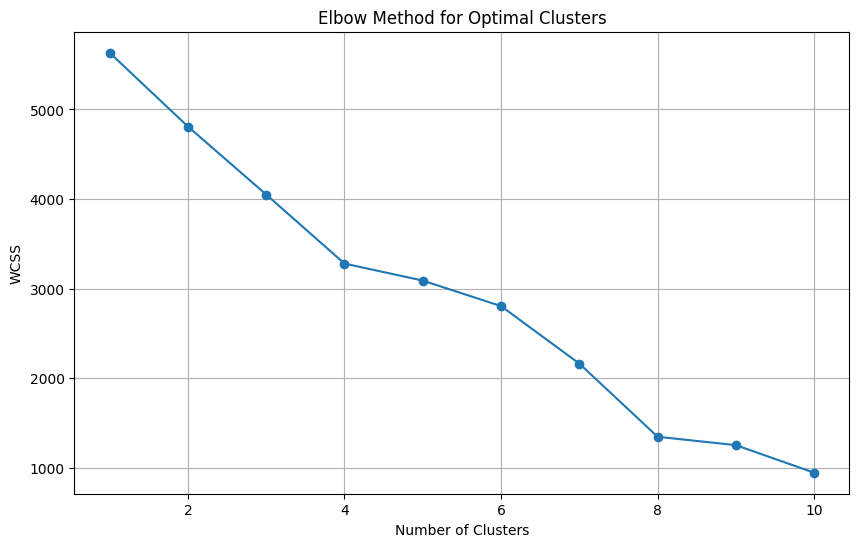

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant numeric features for clustering
features = [
    'Active_Video_Game_Hours',
    'Non_Active_Video_Game_Hours',
    'Sports_Hours',
    'Walking_Biking_Hours',
    'Household_Chores_Hours',
    'Physical_Education_Hours'
]

# Ensure the selected columns exist in the data
clustering_data = recall_data[features].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data)

# Use the Elbow Method to find the optimal number of clusters
wcss = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the time columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(recall_data[time_columns])

# Apply KMeans clustering
optimal_clusters = 4  # From the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
recall_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Verify clustering results
print("Cluster Assignments:")
print(recall_data[['Cluster'] + time_columns].head())


Cluster Assignments:
   Cluster  Active_Video_Game_Hours  Non_Active_Video_Game_Hours  \
0        0                      0.0                         0.75   
1        0                      0.0                         0.75   
2        0                      0.0                         3.00   
3        0                      0.0                         4.00   
4        0                      0.0                         0.00   

   Sports_Hours  Walking_Biking_Hours  Household_Chores_Hours  \
0          0.00              0.750000                    1.00   
1          0.00              1.000000                    1.00   
2          0.75              0.333333                    0.25   
3          0.00              0.333333                    1.50   
4          1.50              0.166667                    0.00   

   Physical_Education_Hours  
0                       0.0  
1                       0.5  
2                       0.5  
3                       0.0  
4                       0.0  

Cluster Characteristics:
         Active_Video_Game_Hours  Non_Active_Video_Game_Hours  Sports_Hours  \
Cluster                                                                       
0                       0.220842                     0.523012      0.521059   
1                      30.000000                     0.000000      0.500000   
2                       0.208333                     3.107143      4.803571   
3                       0.000000                     0.000000      1.000000   

         Walking_Biking_Hours  Household_Chores_Hours  \
Cluster                                                 
0                    0.351790                0.312771   
1                    0.000000                0.000000   
2                    8.166667                5.758333   
3                    0.333333                0.000000   

         Physical_Education_Hours  
Cluster                            
0                        0.157683  
1                        0.250000  
2            

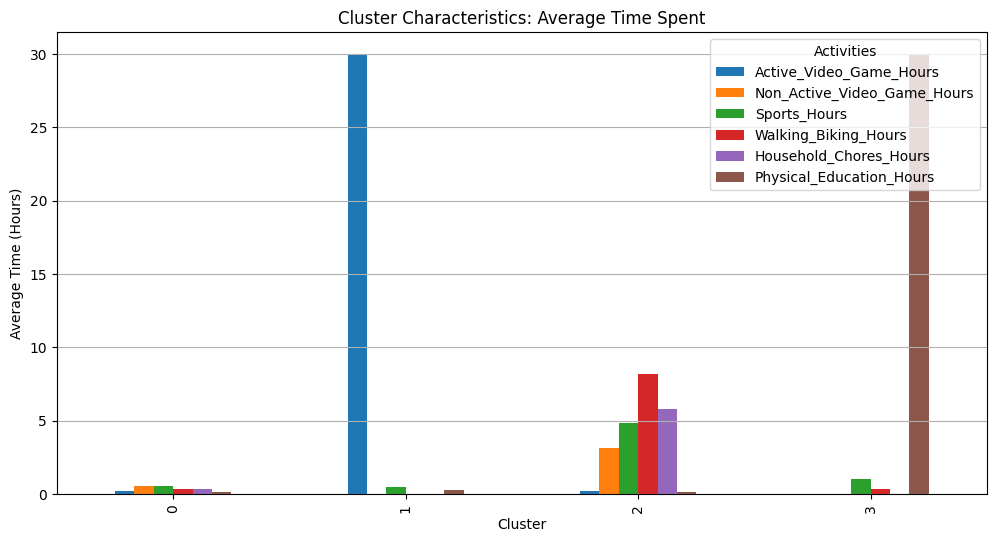

In [ ]:
# Summarize cluster characteristics
cluster_summary = recall_data.groupby('Cluster')[time_columns].mean()

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_summary)

# Visualize cluster characteristics
cluster_summary.plot(kind='bar', figsize=(12, 6))
plt.title("Cluster Characteristics: Average Time Spent")
plt.ylabel("Average Time (Hours)")
plt.xlabel("Cluster")
plt.legend(loc='upper right', title="Activities")
plt.grid(axis='y')
plt.show()


In [ ]:
# Convert time columns to numeric
for col in time_columns:
    recall_data[col] = pd.to_numeric(recall_data[col], errors='coerce')

# Verify conversion
print(recall_data[time_columns].dtypes)


Active_Video_Game_Hours        float64
Non_Active_Video_Game_Hours    float64
Sports_Hours                   float64
Walking_Biking_Hours           float64
Household_Chores_Hours         float64
Physical_Education_Hours       float64
dtype: object


In [ ]:
# Convert 'Week:(Response)' to numeric, handling 'baseline' values
recall_data['Week:(Response)'] = recall_data['Week:(Response)'].replace('baseline', 0)
recall_data['Week:(Response)'] = pd.to_numeric(recall_data['Week:(Response)'], errors='coerce')

recall_data['Week:(Response)'].fillna(0, inplace=True)

print(recall_data['Week:(Response)'].dtype)
print(recall_data['Week:(Response)'].unique())

float64
[10.  6.  3.  1.  0.]


<ipython-input-21-52077ffd57ad>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  recall_data['Week:(Response)'].fillna(0, inplace=True)


In [ ]:
trend_data = recall_data.groupby(['Cluster', 'Week:(Response)']).mean(numeric_only=True)

print("Trend Data Sample:")
print(trend_data.head())


Trend Data Sample:
                         Active_Video_Game_Hours  Non_Active_Video_Game_Hours  \
Cluster Week:(Response)                                                         
0       0.0                             0.047120                     0.891274   
        1.0                             0.417870                     0.349259   
        3.0                             0.291204                     0.431296   
        6.0                             0.254813                     0.454011   
        10.0                            0.105072                     0.470562   

                         (3.1)  How long did you watch TV/DVD?(Hours:)  \
Cluster Week:(Response)                                                  
0       0.0                                                   1.665794   
        1.0                                                   1.413426   
        3.0                                                   1.583519   
        6.0                                

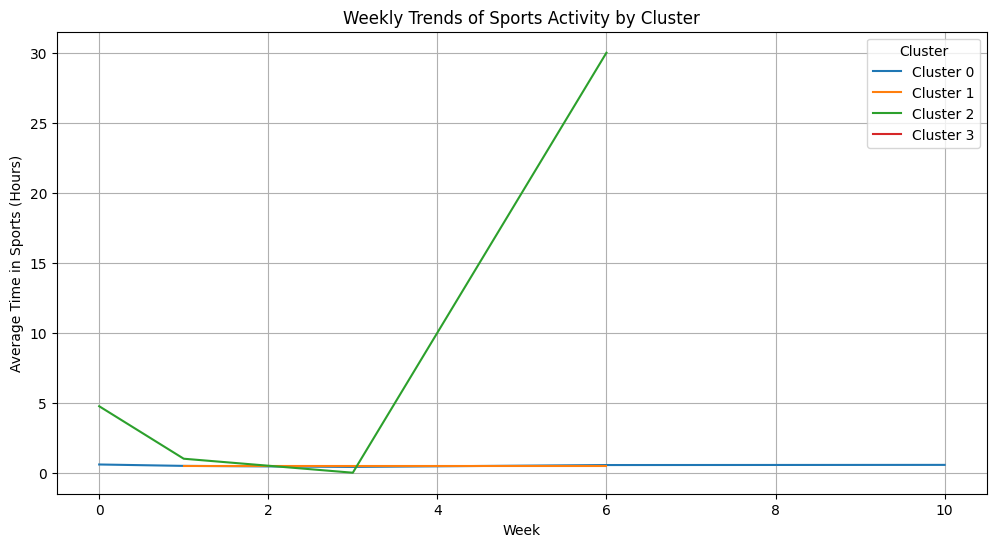

In [ ]:
# Plot trends for SportsMinutes
plt.figure(figsize=(12, 6))
for cluster in range(optimal_clusters):
    cluster_trend = trend_data.loc[cluster]
    plt.plot(cluster_trend.index, cluster_trend['Sports_Hours'], label=f'Cluster {cluster}')
plt.title("Weekly Trends of Sports Activity by Cluster")
plt.xlabel("Week")
plt.ylabel("Average Time in Sports (Hours)")
plt.legend(title="Cluster")
plt.grid()
plt.show()


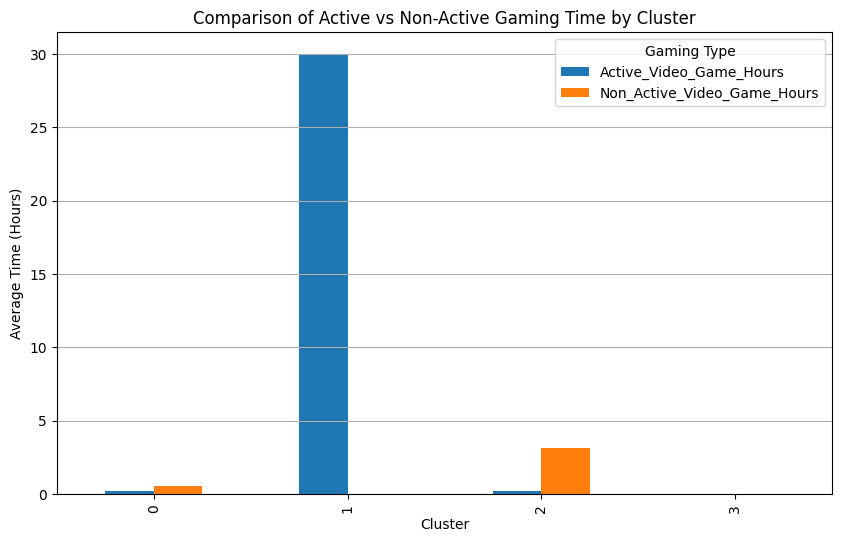

In [ ]:
# Comparison of active vs. non-active gaming time by cluster
cluster_comparison = recall_data.groupby('Cluster')[
    ['Active_Video_Game_Hours', 'Non_Active_Video_Game_Hours']
].mean()

cluster_comparison.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Active vs Non-Active Gaming Time by Cluster")
plt.ylabel("Average Time (Hours)")
plt.xlabel("Cluster")
plt.legend(loc='upper right', title="Gaming Type")
plt.grid(axis='y')
plt.show()


In [ ]:
column_name_7 = recall_data.columns[7]
print(f"Column name at index 7:{column_name_7}")

column_name_13 = recall_data.columns[13]
print(f"Column name at index 13:{column_name_13}")


Column name at index 7:(3.1)  How long did you watch TV/DVD?(Hours:)
Column name at index 13:(9.1)  How much time did you spend in school?(Hours:)


<ipython-input-27-47aeddcaba42>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Week:(Response)', y='Active_Video_Game_Hours', data=recall_data, inner='box', palette='Dark2') #Switched x and y


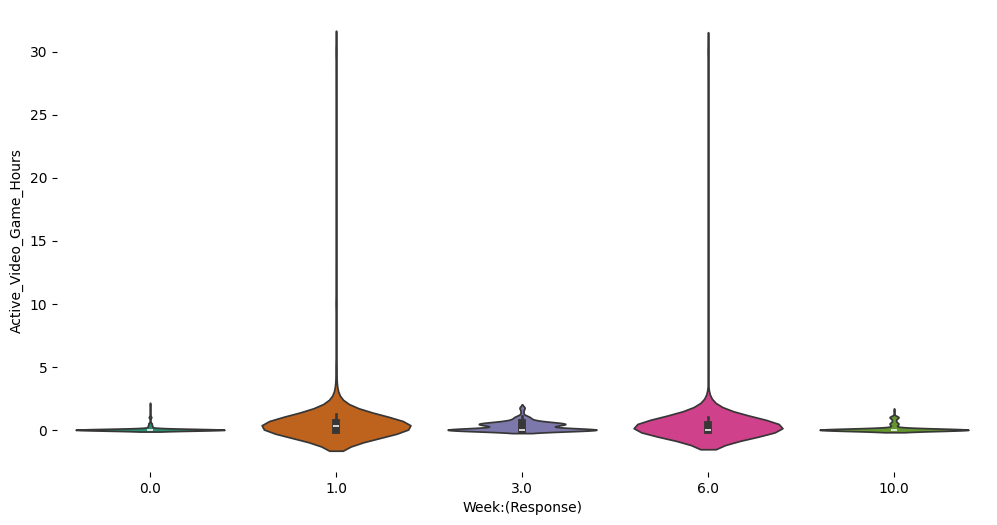

In [ ]:
# Week:(Response) vs Active_Video_Game_Hours
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(recall_data['Week:(Response)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x='Week:(Response)', y='Active_Video_Game_Hours', data=recall_data, inner='box', palette='Dark2') #Switched x and y
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

<ipython-input-29-2d9dfd8caafc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Week:(Response)', y='Non_Active_Video_Game_Hours', data=recall_data, inner='box', palette='Dark2') #Switched x and y


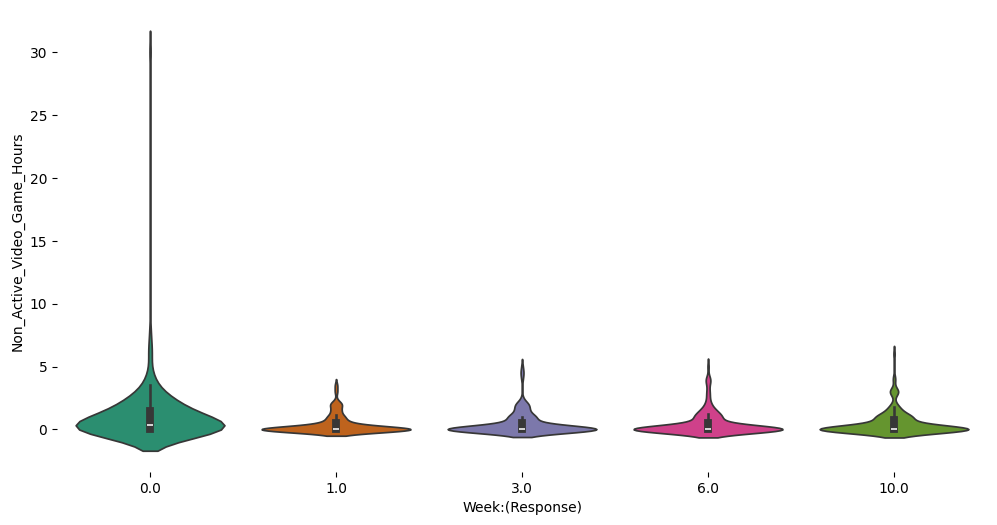

In [ ]:
# Week:(Response) vs Non_Active_Video_Game_Hours
figsize = (12, 1.2 * len(recall_data['Week:(Response)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x='Week:(Response)', y='Non_Active_Video_Game_Hours', data=recall_data, inner='box', palette='Dark2') #Switched x and y
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

In [ ]:
recall_data.columns = recall_data.columns.str.replace("_", " ")

recall_data.head()

,Volunteer Number:(Open-Ended Response),Week:(Response),Date:(Please enter date:),(1A) What time did you go to bed?(Time:),(1B) What time did you get up?(Time:),Active Video Game Hours,Non Active Video Game Hours,(3.1) How long did you watch TV/DVD?(Hours:),(4.1) How long did you use the computer?(Hours:),(5.1) How much time did you spend doing your homework?(Hours:),(6.1) How much time did you spend in social activities?(Hours:),(7.1) How much time did you spend in other hobbies?(Hours:),"(8.1) How much time did you spend in other transportation (car, bus, etc)?(Hours:)",(9.1) How much time did you spend in school?(Hours:),Sports Hours,Walking Biking Hours,Household Chores Hours,Physical Education Hours,Cluster
0,3,10.0,06/05/2017,10:36 PM,08:32 AM,0.0,0.75,1.0,30.00,0.0,5.0,1.00,0.000000,0.0,0.00,0.750000,1.00,0.0,0
1,3,10.0,05/30/2017,10:00 PM,07:30 AM,0.0,0.75,0.0,30.00,0.0,4.0,1.00,0.000000,7.0,0.00,1.000000,1.00,0.5,0
2,3,10.0,05/26/2017,09:45 PM,07:00 AM,0.0,3.00,1.0,1.00,0.0,3.0,0.50,0.166667,8.0,0.75,0.333333,0.25,0.5,0
3,3,10.0,05/27/2017,10:00 PM,06:45 AM,0.0,4.00,1.5,0.75,0.0,5.0,0.00,0.333333,0.0,0.00,0.333333,1.50,0.0,0
4,3,6.0,04/19/2017,09:30 PM,07:22 AM,0.0,0.00,0.0,0.00,0.0,1.0,2.75,0.416667,7.0,1.50,0.166667,0.00,0.0,0


In [ ]:
# Correct mapping logic for renaming columns
rename_mapping = {
    "(3.1)": "TV/DVD",
    "(9.1)": "School"
}

# Apply the renaming to match the mapping exactly
for old_name, new_name in rename_mapping.items():
    recall_data.rename(columns=lambda col: new_name if old_name in col else col, inplace=True)

In [ ]:
recall_data.head()

,Volunteer Number:(Open-Ended Response),Week:(Response),Date:(Please enter date:),(1A) What time did you go to bed?(Time:),(1B) What time did you get up?(Time:),Active Video Game Hours,Non Active Video Game Hours,TV/DVD,(4.1) How long did you use the computer?(Hours:),(5.1) How much time did you spend doing your homework?(Hours:),(6.1) How much time did you spend in social activities?(Hours:),(7.1) How much time did you spend in other hobbies?(Hours:),"(8.1) How much time did you spend in other transportation (car, bus, etc)?(Hours:)",School,Sports Hours,Walking Biking Hours,Household Chores Hours,Physical Education Hours,Cluster
0,3,10.0,06/05/2017,10:36 PM,08:32 AM,0.0,0.75,1.0,30.00,0.0,5.0,1.00,0.000000,0.0,0.00,0.750000,1.00,0.0,0
1,3,10.0,05/30/2017,10:00 PM,07:30 AM,0.0,0.75,0.0,30.00,0.0,4.0,1.00,0.000000,7.0,0.00,1.000000,1.00,0.5,0
2,3,10.0,05/26/2017,09:45 PM,07:00 AM,0.0,3.00,1.0,1.00,0.0,3.0,0.50,0.166667,8.0,0.75,0.333333,0.25,0.5,0
3,3,10.0,05/27/2017,10:00 PM,06:45 AM,0.0,4.00,1.5,0.75,0.0,5.0,0.00,0.333333,0.0,0.00,0.333333,1.50,0.0,0
4,3,6.0,04/19/2017,09:30 PM,07:22 AM,0.0,0.00,0.0,0.00,0.0,1.0,2.75,0.416667,7.0,1.50,0.166667,0.00,0.0,0


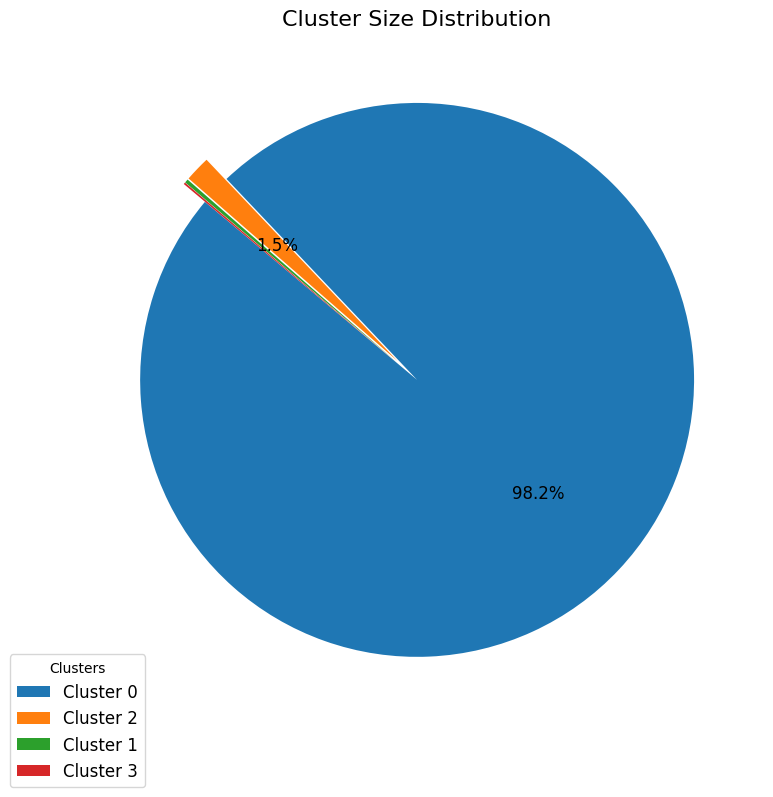

In [ ]:
import matplotlib.pyplot as plt

# Cluster size distribution
cluster_sizes = recall_data['Cluster'].value_counts()

# Exploding slices for better clarity
explode = [0.1 if cluster_sizes.index[i] != 0 else 0 for i in range(len(cluster_sizes))]

# Custom autopct function to hide percentages < 1%
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''  # Show only if percentage >= 1

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    cluster_sizes,
    autopct=autopct_format,  # Use custom formatting
    explode=explode,
    startangle=140,
    textprops={'fontsize': 12, 'color': 'black'},
    labels=None,  # Remove labels from the pie
)

# Add legend at the bottom left
ax.legend(
    wedges,
    [f"Cluster {i}" for i in cluster_sizes.index],
    title="Clusters",
    loc='lower left',  # Position legend in bottom left
    bbox_to_anchor=(-0.1, -0.1),  # Fine-tune placement
    fontsize=12
)

# Add title and tidy up layout
plt.title("Cluster Size Distribution", fontsize=16)
plt.tight_layout()
plt.show()
